# EWMA

In [ ]:
"""
# Exponential Weighted Moving Average (EWMA)

## Overview
The Exponential Weighted Moving Average (EWMA) is a statistical technique used to find trends in time-series data.
 It's a type of moving average that assigns more weight to recent data points, making it more sensitive to recent changes in the data.
  This is in contrast to a simple moving average, which treats all data points equally.

## How EWMA Works
- **Weighting Mechanism**:
  - EWMA uses a smoothing factor (denoted as α or β) that ranges between 0 and 1. A higher value of α gives more weight to recent observations.
  - The formula for calculating EWMA at time \( t \) is:

  \[
  EWMA_t = \beta \cdot x_t + (1 - \beta) \cdot EWMA_{t-1}
  \]

- **Recursive Calculation**:
  - The current EWMA value is calculated using the previous EWMA value, which allows for an exponentially decaying weight for older observations.

## Uses of EWMA
- **Time-Series Analysis**:
  - EWMA is widely used in finance for stock price analysis, volatility modeling, and technical analysis.
- **Machine Learning**:
  - In machine learning, EWMA is utilized in optimization algorithms like Adam, where it helps in adjusting learning rates and stabilizing the training process.
- **Control Charts**:
  - It is also used in quality control to monitor process data over time, providing insights into process stability.

## Limitations of EWMA
- **Sensitivity to Outliers**:
  - While EWMA is effective in smoothing data, it can be sensitive to outliers, which may skew the results.
- **Parameter Selection**:
  - The choice of the smoothing factor (α or β) can significantly affect the results.
   Selecting an inappropriate value may lead to either over-smoothing or under-smoothing of the data.
- **Not Suitable for All Data Types**:
  - EWMA may not perform well with non-stationary data or data with strong seasonal patterns without additional adjustments.

## Conclusion
The Exponential Weighted Moving Average is a powerful tool for smoothing noise in time-series data,
 making it particularly useful in various fields, including finance and machine learning.
  Understanding how it works and its limitations can help in effectively applying it to real-world problems.

## References
- For further reading, consider exploring resources on time-series analysis, machine learning optimizers, and statistical process control.

"""

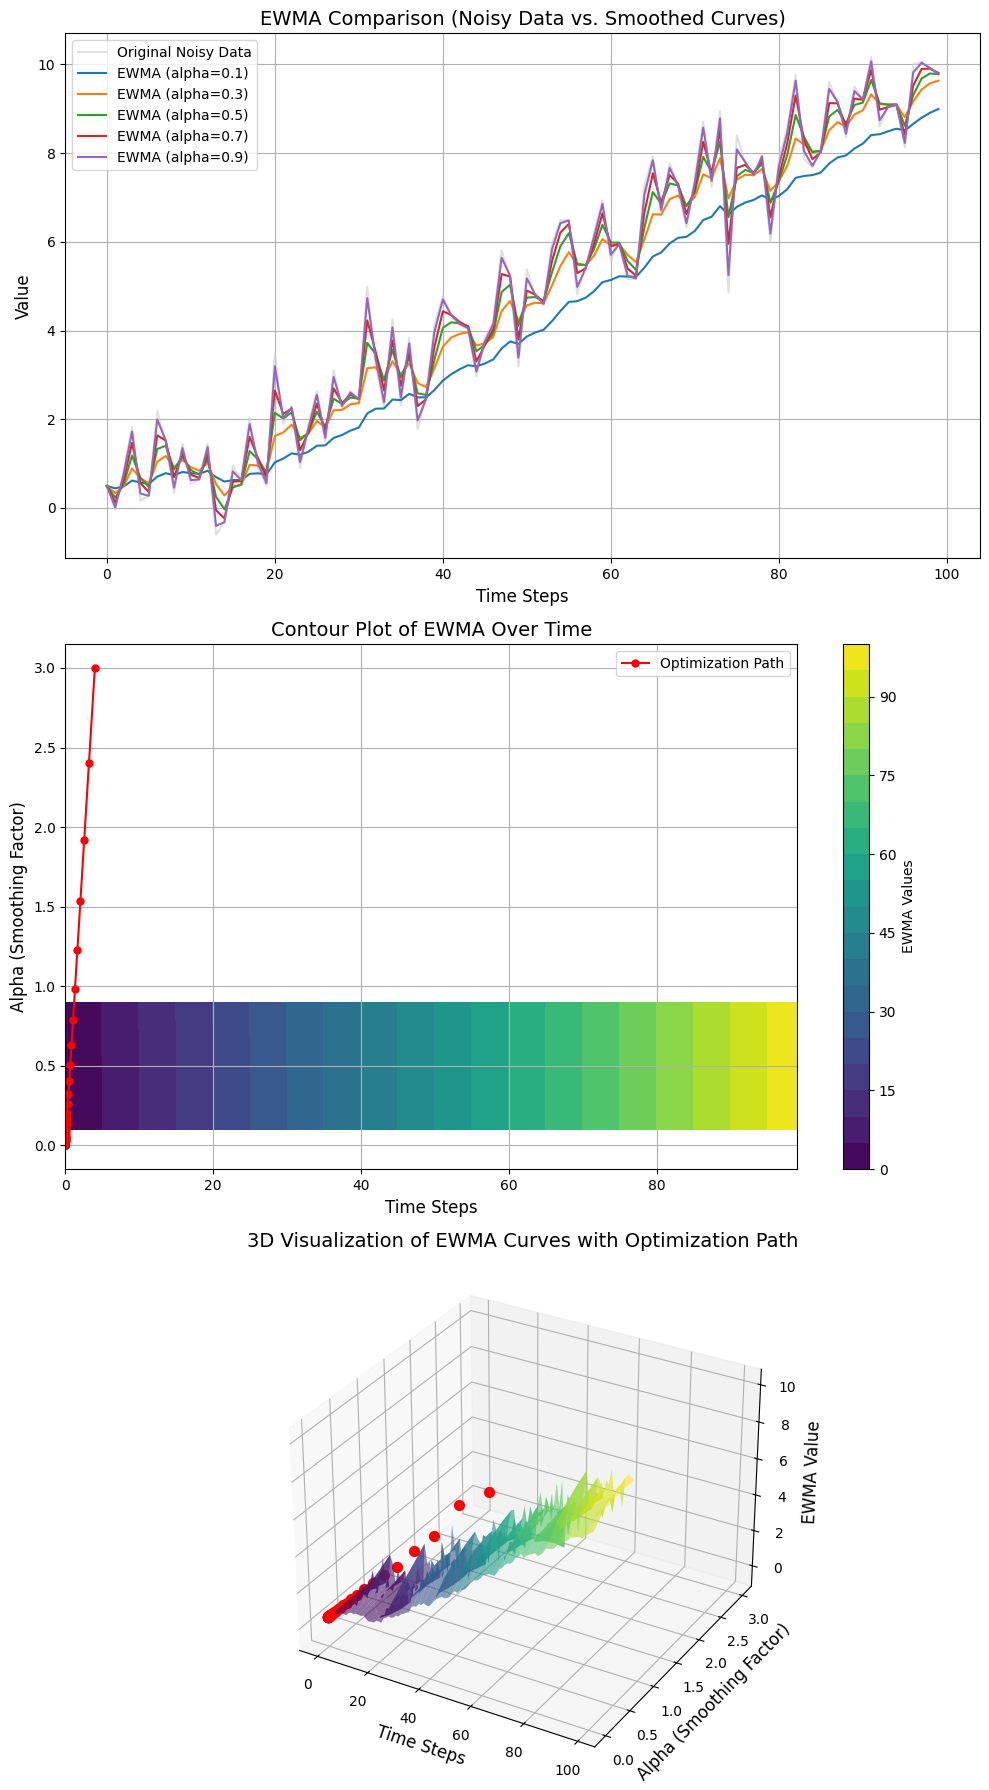

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to calculate the Exponentially Weighted Moving Average (EWMA)
def calculate_ewma(input_data, alpha):
    """Computes the Exponentially Weighted Moving Average (EWMA) for the given input data."""
    result = np.zeros(len(input_data))  # Initialize array to hold EWMA results
    result[0] = input_data[0]  # The first element is initialized as the starting value

    # Calculate the EWMA values for all time steps
    for idx in range(1, len(input_data)):
        result[idx] = alpha * input_data[idx] + (1 - alpha) * result[idx - 1]

    return result

# Function to plot the original noisy data alongside the EWMA curves
def display_ewma_comparison(original_data, ewma_results, alphas):
    """Displays a plot comparing noisy data with the corresponding EWMA curves for each alpha value."""
    plt.plot(original_data, label='Original Noisy Data', color='lightgray', alpha=0.7)
    for alpha_value, ewma_vals in ewma_results.items():
        plt.plot(ewma_vals, label=f'EWMA (alpha={alpha_value})')

    plt.title('EWMA Comparison (Noisy Data vs. Smoothed Curves)', fontsize=14)
    plt.xlabel('Time Steps', fontsize=12)
    plt.ylabel('Value', fontsize=12)
    plt.legend()
    plt.grid(True)

#function to generate contour
def display_ewma_contour(ewma_results, alphas, optimization_path=None):
    """Generates a contour plot showing the evolution of EWMA curves
    for varying alpha values, with an optional optimization path overlay."""

    contour_data = np.array([ewma_results[alpha] for alpha in alphas])
    X, Y = np.meshgrid(range(contour_data.shape[1]), alphas)

    R = np.sqrt(X**2 + Y**2)

    plt.contourf(X, Y, R, cmap='viridis', levels=20)

    if optimization_path is not None:
        plt.plot(optimization_path[:, 0], optimization_path[:, 1],
                 marker='o', color='red', markersize=5, label='Optimization Path')

    plt.title('Contour Plot of EWMA Over Time', fontsize=14)
    plt.xlabel('Time Steps', fontsize=12)
    plt.ylabel('Alpha (Smoothing Factor)', fontsize=12)
    plt.colorbar(label='EWMA Values')
    plt.legend()
    plt.grid(True)

# Function to generate the 3D surface plot
def display_ewma_3d_surface(ax, ewma_results, alphas, noisy_data, optimization_path=None):
    """Generates a 3D surface plot of EWMA values based on time and smoothing factors,
    with an optional optimization path overlay."""
    X_3d, Y_3d = np.meshgrid(range(len(noisy_data)), alphas)  # Prepare grid for 3D surface plot
    Z_3d = np.array([ewma_results[alpha] for alpha in alphas])  # Z values are the EWMA results for each alpha

    ax.plot_surface(X_3d, Y_3d, Z_3d, cmap='viridis', alpha=0.6)

    if optimization_path is not None:
        for point in optimization_path:
            ax.scatter(point[0], point[1], Z_3d[point[1].astype(int), point[0].astype(int)], color='red', s=50)

    ax.set_title('3D Visualization of EWMA Curves with Optimization Path', fontsize=14)
    ax.set_xlabel('Time Steps', fontsize=12)
    ax.set_ylabel('Alpha (Smoothing Factor)', fontsize=12)
    ax.set_zlabel('EWMA Value', fontsize=12)

# Define the cost function (for optimization)
def cost_function(x, y):
    """A simple quadratic cost function."""
    return -np.exp(-(x**2 + y**2))  # This is just a simple example (a paraboloid)

# Gradient of the cost function (used for gradient descent)
def gradient(x, y):
    """Gradient of the cost function."""
    dx = 2 * x  # Derivative with respect to x
    dy = 2 * y  # Derivative with respect to y
    return np.array([dx, dy])

# Function to simulate optimization path using gradient descent
def gradient_descent(starting_point, learning_rate, iterations):
    """Performs gradient descent on the cost function."""
    path = [starting_point]  # List to store the path of optimization
    current_point = starting_point

    for _ in range(iterations):
        grad = gradient(current_point[0], current_point[1])  # Compute gradient
        current_point = current_point - learning_rate * grad  # Update current point
        path.append(current_point)  # Store the new point in the path

    return np.array(path)

def main():
    np.random.seed(42)  # Ensure reproducibility of the results

    # EWMA Data Preparation
    time_points = np.linspace(0, 10, 100)
    noise = np.random.normal(0, 1, time_points.shape)
    noisy_signal = time_points + noise

    # List of smoothing factors (alpha) to evaluate
    alphas = [0.1, 0.3, 0.5, 0.7, 0.9]
    ewma_results = {}

    # Calculate the EWMA for each smoothing factor
    for alpha_value in alphas:
        ewma_results[alpha_value] = calculate_ewma(noisy_signal, alpha_value)

    starting_point = np.array([4, 3])  # Initial guess for optimization
    learning_rate = 0.1  # Learning rate for gradient descent
    iterations = 50  # Number of gradient descent

    optimization_path = gradient_descent(starting_point, learning_rate, iterations)

    fig = plt.figure(figsize=(10, 18))

    ax1 = fig.add_subplot(3, 1, 1)
    display_ewma_comparison(noisy_signal, ewma_results, alphas)

    ax2 = fig.add_subplot(3, 1, 2)
    display_ewma_contour(ewma_results, alphas, optimization_path)

    ax3 = fig.add_subplot(3, 1, 3, projection='3d')
    display_ewma_3d_surface(ax3, ewma_results, alphas, noisy_signal, optimization_path)

    plt.tight_layout()
    plt.show()

# Run the main function
if __name__ == "__main__":
    main()
